# Topperworld: Artificial Intelligence
## Task2: Resume Parser
### Objective: The objective of the resume parser project in AI is to develop a sophisticated system capable of automatically extracting relevant information from resumes or CVs, such as contact details, work experience, education, skills, and other relevant sections, and converting it into a structured format.


In [116]:
# Importing basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [117]:
# Reading the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# Exploratory Data Analysis

## Visualization

In [118]:
# For visualization
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

In [119]:
# Calculate value counts for each category
category_counts = df['Category'].value_counts()

In [120]:
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values
})
plot_data.head()

,Category,Count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45


In [121]:
# Creating the bar plot
fig = px.bar(plot_data, x='Category', y='Count',
             color='Category', 
             labels={'Category': 'Job', 'Count': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    title='Bar plot depicting count of a particular Job',
    xaxis_title='Job Type',
    yaxis_title='Count',
    legend_title='Job Categories',
    showlegend=True,
    xaxis=dict(tickangle=-45),
    font=dict(family='Arial', size=12),
    plot_bgcolor='white'
)

fig.show()

In [122]:
# Creating the pie plot
fig = px.pie(plot_data, values='Count', names='Category',
             title='Pie plot depicting count of a particular Job',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=0.4,
             labels={'Category': 'Categories', 'Count': 'Count'},
             opacity=0.8,
             )

# Customize the layout
fig.update_layout(
    legend_title='Categories',
    font=dict(family='Arial', size=16, color='black'),
    plot_bgcolor='white',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.show()

## Data Pre-processing

In [123]:
# Preprocessing libraries
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\MD
[nltk_data]     KAMALUDDIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
def preprocess_text(text_to_clean):
    # Remove URLs
    cleaned_text = re.sub('http\S+\s*', ' ', text_to_clean)
    # Remove RT and cc
    cleaned_text = re.sub('RT|cc', ' ', cleaned_text)
    # Remove hashtags
    cleaned_text = re.sub('#\S+', '', cleaned_text)
    # Remove mentions
    cleaned_text = re.sub('@\S+', ' ', cleaned_text)
    # Remove punctuations
    cleaned_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleaned_text)
    # Remove non-ASCII characters
    cleaned_text = re.sub(r'[^\x00-\x7f]', r' ', cleaned_text)
    # Replace multiple spaces with a single space
    cleaned_text = re.sub('\s+', ' ', cleaned_text)
    # Remove leading and trailing whitespaces
    cleaned_text = cleaned_text.strip()
    
    return cleaned_text

In [125]:
df['cleaned_text'] = df['Resume'].apply(lambda x:preprocess_text(x))
df.head()

,Category,Resume,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...



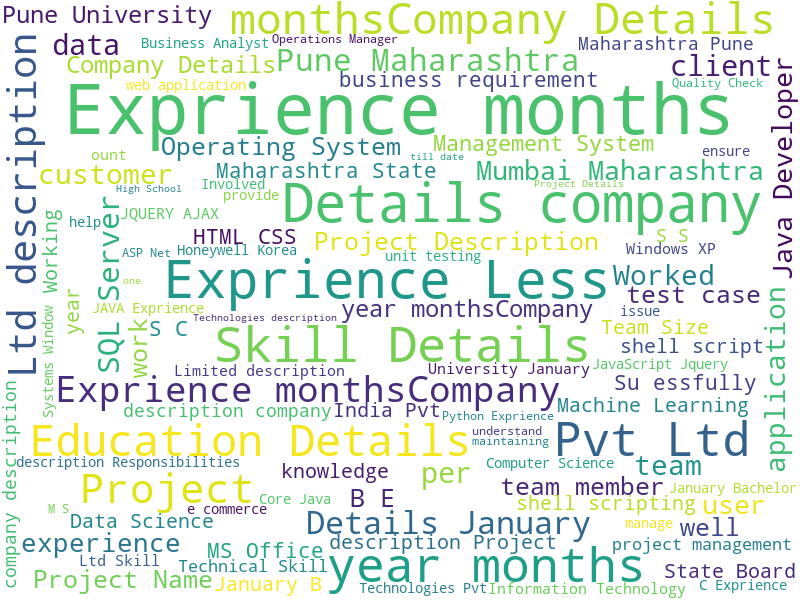

In [126]:
# Join the cleaned text into a single string
text = ' '.join(df['cleaned_text'])

# Create a word cloud
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=600,
                      max_words=100,
                      colormap='viridis'
                      ).generate(text)

# Convert word cloud to an image
wordcloud_image = wordcloud.to_image()

# Display the word cloud using Plotly as an image
fig = px.imshow(wordcloud_image)
fig.update_layout(
    title='Word Cloud of Cleaned Text',
    xaxis_showticklabels=False,
    yaxis_showticklabels=False,
    plot_bgcolor='white'
)
fig.show()

In [127]:
# Forming our corpus
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned_text"][i]

In [128]:
# Tokenizing our cleaned text
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)
print("Number of tokens:", len(tokens))

Number of tokens: 411281


In [129]:
# Now lower everything in our corpus and storing it in new variable words
words = []
for word in tokens:
    words.append(word.lower())

In [130]:
# Label encoding our Category
label = LabelEncoder()
df['Category_but_Encoded'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned_text,Category_but_Encoded
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


In [135]:
# Create the histogram using Plotly Express
fig = px.histogram(df, x='Category_but_Encoded',
                   title='Histogram of Encoded Categories',
                   labels={'Category_but_Encoded': 'Encoded Category'},
                   nbins=10,
                   opacity=0.7,
                   color_discrete_sequence=['#1f77b4']
                   )

fig.update_layout(
    xaxis_title='Encoded Category',
    yaxis_title='Count',
    font=dict(family='Arial', size=12, color='black'),
    legend_title='Categories',
    legend=dict(orientation='h', x=0.5, y=1.15),
    margin=dict(t=80, b=80, l=80, r=80),
)

# Show the interactive plot
fig.show()

In [136]:
# Vectorizing the cleaned columns
text = df['cleaned_text'].values
target = df['Category_but_Encoded'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [137]:
WordFeatures.shape

(962, 1500)

# Model Training

In [138]:
# For model training
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [139]:
# Doing train test split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [141]:
# Model Training
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [142]:
# Prediction
y_pred = model.predict(X_test)

In [143]:
print("Training Accuracy   :-", (model.score(X_train, y_train)*100).round(2) ,"%")
print("Validation Accuracy :-", (model.score(X_test, y_test)*100).round(2) ,"%")

Training Accuracy   :- 98.96 %
Validation Accuracy :- 96.89 %


In [144]:
print(metrics.classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

In [145]:
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [146]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\MD
[nltk_data]     KAMALUDDIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [147]:
# Performing Lemmatization
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to C:\Users\MD
[nltk_data]     KAMALUDDIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [148]:
lem_words[0:5]

['skill', 'programming', 'language', 'python', 'panda']

In [149]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 291
Number of words not Lemmatized= 1541


In [150]:
# Calculate the frequency distribution
freq_dist = nltk.FreqDist(lem_words)

# Get the top 50 most common words
common_words = freq_dist.most_common(50)

# Extract words and frequencies for the plot
words, frequencies = zip(*common_words)

In [151]:
# Creating a line plot
fig = go.Figure(go.Scatter(
    x=words,
    y=frequencies,
    mode='lines+markers',  # Line plot with markers
    marker=dict(color='rgb(26, 118, 255)')
))

fig.update_layout(
    title='Top 50 Most Common Words in the Text',
    xaxis_title='Words',
    yaxis_title='Frequency',
    font=dict(family='Arial', size=12),
    plot_bgcolor='white'
)

# Show the interactive plot
fig.show()

In [ ]:
# Join the lemmatized words into a string
res = ' '.join([i for i in lem_words if not i.isdigit()])

# Create a word cloud
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=2800,
                      height=2200
                      ).generate(res)

# Convert the word cloud to an image
wordcloud_image = wordcloud.to_image()

# Display the word cloud using Plotly as an image
fig = go.Figure(go.Image(z=wordcloud_image))
fig.update_layout(
    title='Resume Text WordCloud',
    xaxis_showticklabels=False,
    yaxis_showticklabels=False
)
fig.show()